In [ ]:
#2020 is an unusual year. A kind of novel coronavirus is spreading the whole globe. 
#I collected the raw data from official news about the confirmed cases in the United States. 
#The data is imcompleted and has some missing values due to privacy policy.

#The file has 8 feature columns:
#Case_Id: number ID of confirmed case in US.
#Date: the dates of the confirmed cases.
#City: the city of the confirmed case.
#State: the state of confirmed case. 
#California included the cases from Diamond Princess cruise returnees and Wuhan Chartered-flight returnees.
#Gender: have missing values
#Age: have missing values.
#Details: Spreading information
#Origin: 'Person' means person to person spread case.

In [29]:
import pandas as pd
import numpy as np 
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the Figures Inline
%matplotlib inline

In [30]:
data=pd.read_csv(r'C:\Users\ludai\Desktop\Coronavirus_Data_USA.csv')
data.head()


,Case_Id,Date,City,State,Gender,Age,Details,Origin
0,1,1/21/2020,Everett,WA,M,30+,Traveled Wuhan,China
1,2,1/24/2020,Chicago,IL,F,60+,Traveled Wuhan,China
2,3,1/26/2020,Orange County,CA,M,50+,Traveled Wuhan,China
3,4,1/26/2020,Los Angeles,CA,NaN,NaN,Traveled Wuhan,China
4,5,1/26/2020,Tempe,AZ,M,NaN,Traveled Wuhan,China


In [31]:
#check each column's data type
data.dtypes

Case_Id     int64
Date       object
City       object
State      object
Gender     object
Age        object
Details    object
Origin     object
dtype: object

In [32]:
#Finding the null values
print(data.isnull().sum())

Case_Id     0
Date        0
City        1
State       0
Gender     69
Age        64
Details     0
Origin      0
dtype: int64


In [33]:
data.describe(include='all')


,Case_Id,Date,City,State,Gender,Age,Details,Origin
count,80.0000,80,79,80,11,16,80,80
unique,NaN,18,21,10,2,10,16,8
top,NaN,2/25/2020,San Diego,CA,M,60+,From Japanese Cruise,Japanese Cruise
freq,NaN,44,46,62,7,3,44,44
mean,40.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,23.2379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,20.7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,40.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,60.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data.Date.describe()
# the 44 confirmed cases on 2/25 were from Princess cruise. 

count            80
unique           18
top       2/25/2020
freq             44
Name: Date, dtype: object

In [35]:
data.columns

Index(['Case_Id', 'Date', 'City', 'State', 'Gender', 'Age', 'Details',
       'Origin'],
      dtype='object')

In [36]:
# Cumulative confirmed cases by date
import plotly.express as px
fig = px.line(data, x='Date', y='Case_Id')
fig.show()

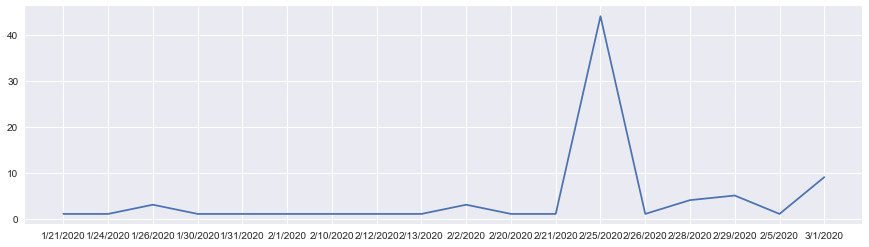

In [37]:
# Daily confirmed cases
plt.figure(figsize=(15,4))
plt.plot(data['Date'].value_counts().sort_index())

In [38]:
data.Origin.describe() # Summary origin of cases. 44 confirmed cases came from Princess cruise.

count                   80
unique                   8
top        Japanese Cruise
freq                    44
Name: Origin, dtype: object

Text(0,0.5,'Numbers')

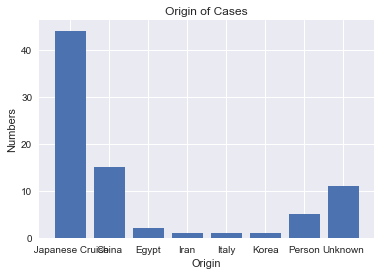

In [39]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = data['Origin'].value_counts()
# get x and y data 
Origin = data.index 
Numbers = data.values 
# create bar chart for origins of confirmed cases
ax.bar(Origin, Numbers) 
# set title and labels 
ax.set_title('Origin of Cases') 
ax.set_xlabel('Origin') 
ax.set_ylabel('Numbers')


In [40]:
# Confirmed cases by states

In [41]:
df=pd.read_csv(r'C:\Users\ludai\Desktop\Coronavirus_Data_USA.csv')
df = df['State'].value_counts().rename_axis('States').reset_index(name='Confirmed_Case')
print (df)
fig = px.choropleth(df,locations="States",locationmode="USA-states", color="Confirmed_Case", 
                    color_continuous_scale=px.colors.sequential.Plasma, scope="usa")
fig.show()

  States  Confirmed_Case
0     CA              62
1     WA               8
2     IL               3
3     NY               1
4     RI               1
5     AZ               1
6     WI               1
7     MA               1
8     TX               1
9     OR               1


In [ ]:
# Data will be updated.
# Let's pull tegether to defeat the new coronavirus!